# Описание проекта
Заказчик интернет-магазин ,который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Изучение общей информации о данных

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv') 
#сохраняю датафрейм в переменную data

In [3]:
data.head(10) 
#вывожу на экран первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() 
#общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 11 столбцов и 16715 строк. В 6 стобцах есть пропуски. 

# Подготовка данных

In [5]:
data.columns = data.columns.str.lower()
#привожу названия столбцов к нижнему регистру

In [6]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
data.isnull().sum() #количество пропусков в стобцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data = data.dropna(axis='index', how='any', subset=['name', 'genre', 'year_of_release'])
#удаляю строки с пропущенными значениями

Имя, жанр и год выпуска не имеет смысла заменять случайными значениями. Пропущенныx значений в этих стобцах мало, поэтому можно просто отбросить строки с пропусками.

In [9]:
data['year_of_release'] = data['year_of_release'].astype(int)
#тип данных меняю на int

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
data['critic_score']= data['critic_score'] / 10 
#оценка максимум 10. Сдвигаю точку на один знак влево

В описании данных указано, что данные за 2016 год могут быть не полными.

In [12]:
data.loc[data['year_of_release'] == 2016].isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       270
user_score         206
rating             222
dtype: int64

Пропуски есть, но это лишь малая часть от всех

In [13]:
data.groupby(['platform'])[['critic_score','user_score','rating']].count()

,critic_score,user_score,rating
platform,,,
2600,0,0,0
3DO,0,0,0
3DS,166,225,223
DC,14,14,14
DS,708,1256,1255
GB,0,0,0
GBA,430,509,514
GC,437,457,457
GEN,0,0,0


Для некоторых платформ отсутствует информация об оценке критиков, оценке пользователей и рейтинге сразу.

Может был передан не полный датасет, а может некоторые платформы отказались предоставлять данные, а может быть некоторые платформы не имеют данных об оценке пользователей, потому что у них нет подключения к сети(игры покупают на сторонних носителях, а онлайн магазин отсутствует).

В rating пропуски могут быть связаны с тем, что организация Entertainment Software Rating Board образовалась в 1994 году и игры, вышедшие до этого года не получили рейтинг от этой организации. 


Заполнять эти пропуски не буду и удалять тоже. 

In [14]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,6.1,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,7.1,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,6.7,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,5.3,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,4.8,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd - to be determined (будет определено позднее). 

Судя по формулировке, можно предположить, что рейтинг пользователей отсутствует т.к. в некоторых регионах продажи еще не запущены или запущены недавно. 

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
#заменяю tbd на пропуски и перевожу в float

In [16]:
data['all_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#суммарные продажи во всех регионах 

In [17]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [18]:
#поставлю заглушку на nan в рейтинге буквой Q
data['rating'] = data['rating'] .fillna('Q')

# Исследовательский анализ данных

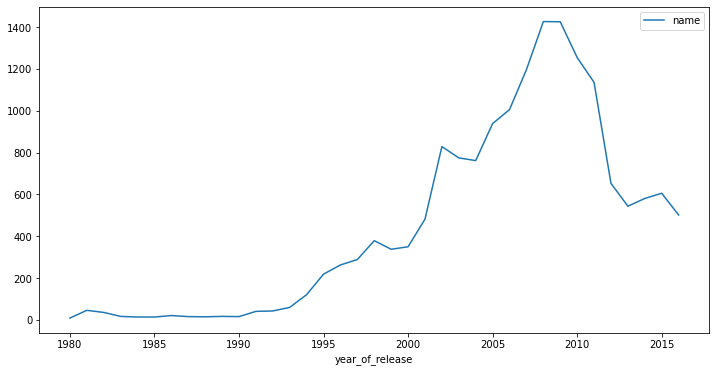

In [19]:
#сколько игр выпускалось в разные годы
plt.figure(figsize=(12,6))
pivot_count_games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
sns.lineplot(data=pivot_count_games_years);

Из линейной диаграммы видно что спрос на компьютерные игры начал расти в середине 90х(думаю что связано с распространением настольных компьютеров), пик спроса пришелся на 2008 год, а дальше наступила эра мобильных приложений и начался спад. 

Наибольшее количество данных находится в промежутке 1995- 2015. Но т.к. надо построить прогноз на 2017 год, думаю будет уместно опираться на данные с 2011 по 2016. 

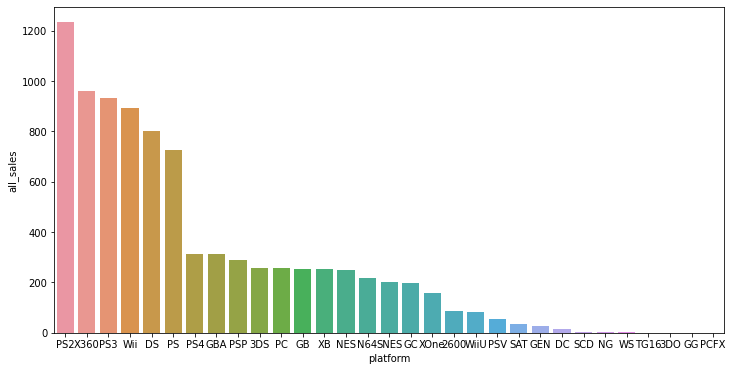

In [20]:
#суммарное количество продаж по платформам
pivot_platform_sales = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_platform_sales.index, y=pivot_platform_sales['all_sales']);

Судя по стобчатой гистограмме можно сделать вывод, что самыми популярными устройствами для игр с 1980 по 2016 были : PS2 и DS далее PS3, Wii, X360 , PSP.

In [21]:
#распределение продаж по платформам и по годам
platform_on_years = pd.DataFrame(data.groupby(['platform','year_of_release'])['all_sales'].sum())
platform_list = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP']
top_platforms = platform_on_years.query('platform in @platform_list').reset_index()
top_platforms

,platform,year_of_release,all_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
64,X360,2012,99.74
65,X360,2013,88.58
66,X360,2014,34.74
67,X360,2015,11.96


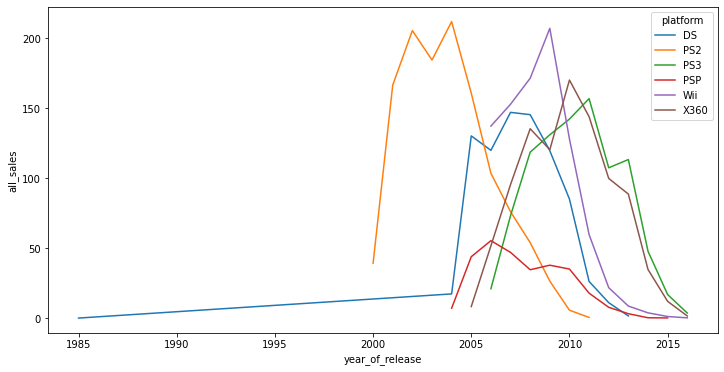

In [22]:
#распределение продаж по годам
plt.figure(figsize=(12,6))
sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=top_platforms)
plt.show()

В среднем игровые платформы актуальны на протяжении 10 лет.

In [23]:
# таблица с данными только за актуальный период 
top_platforms = top_platforms[top_platforms['year_of_release'] > 2010]

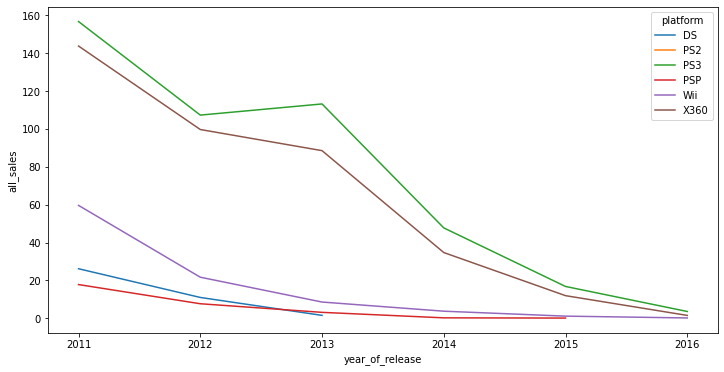

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=top_platforms)
plt.show()

Cамые потенциально прибыльные платформы PS3 и X360.

In [25]:
#новая таблица с актуальными платформами и актуальным периодом
data_new = data[data['year_of_release'] > 2010]
platform_list_new = ['PS3', 'Wii', 'X360', 'PSP']
top_platforms_aktual = data_new.query('platform in @platform_list_new').reset_index()
top_platforms_aktual

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,8.8,3.4,M,14.73
3,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79
4,35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,8.3,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,16659,Hyakki Yagyou Kaidan Romance,PSP,2012,Action,0.00,0.00,0.01,0.00,NaN,NaN,Q,0.01
1711,16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,Q,0.01
1712,16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Q,0.01
1713,16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Q,0.01


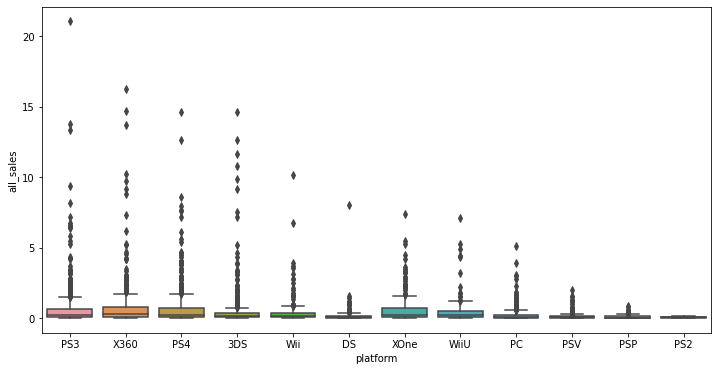

In [26]:
#ящик с усами по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(12,6))
sns.boxplot(data=data_new, x='platform', y='all_sales');
plt.show()

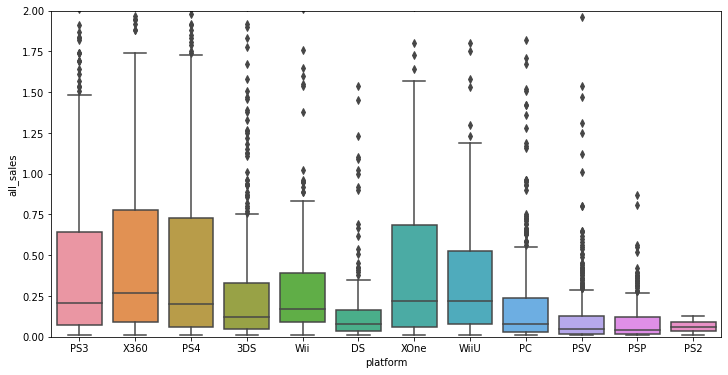

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_new, x='platform', y='all_sales');
plt.ylim(0,2);

In [28]:
#влияние на продажи внутри PS3 отзывов пользователей и критиков
ps3 = data_new[data_new['platform'] == 'PS3']
ps3['user_score'].corr(ps3['all_sales'])

0.014089348308019396

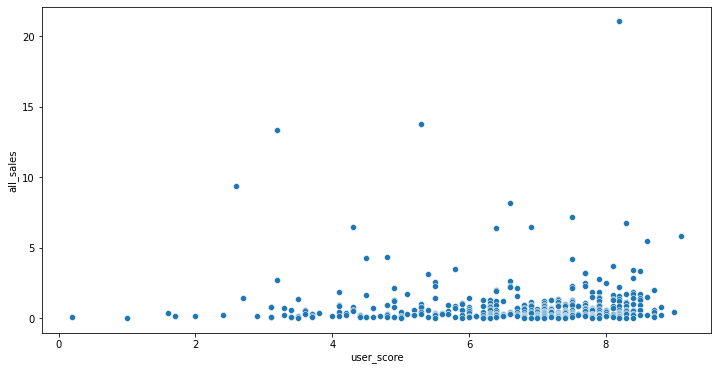

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='all_sales', data=ps3);

Оценка пользователей слабо влияет на количество продаж игр на PS3.

In [30]:
ps3['critic_score'].corr(ps3['all_sales'])

0.38011114718290767

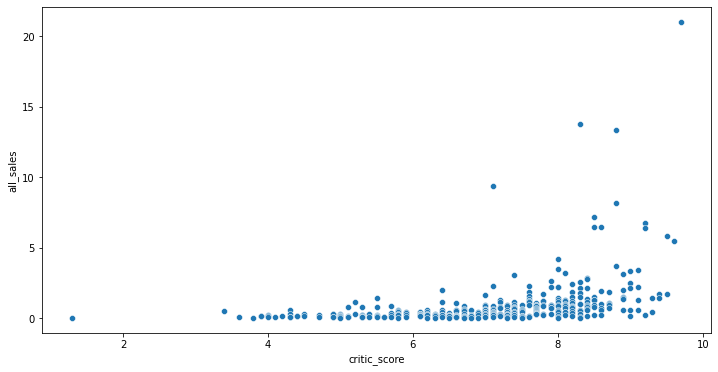

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='all_sales', data=ps3);

Оценка критиков умеренно влияет на количество продаж игр на PS3.

In [32]:
#влияние на продажи отзывов пользователей и критиков
def other_platform(name_of_platform):
    platform = data_new[data_new['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(12,6))
    sns.scatterplot(x='user_score', y='all_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='all_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform)
    plt.show()
    
    correl = platform['user_score'].corr(platform['all_sales'])
    critic_correl = platform['critic_score'].corr(platform['all_sales'])
    
    print('Корреляция между отзывами критиков и продажами', critic_correl)
    print('Корреляция между отзывами пользователей и продажами', correl)

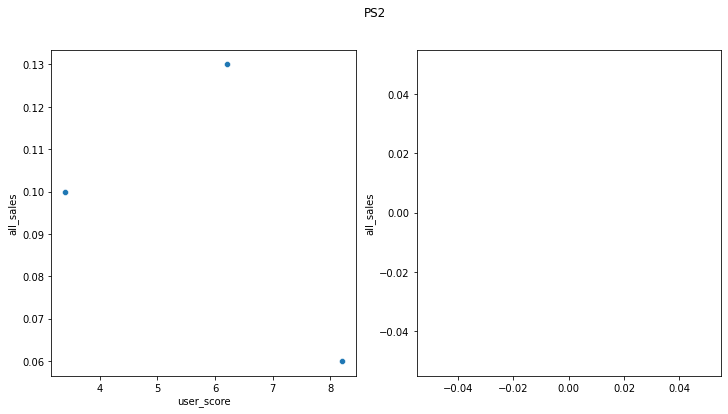

Корреляция между отзывами критиков и продажами nan
Корреляция между отзывами пользователей и продажами -0.4881435810449095


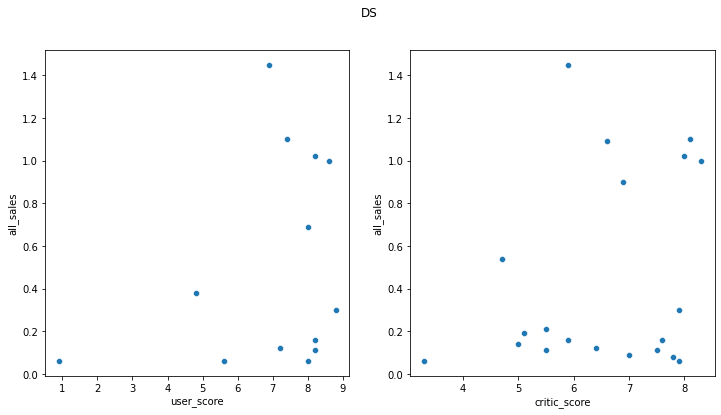

Корреляция между отзывами критиков и продажами 0.2611658597550141
Корреляция между отзывами пользователей и продажами 0.2810294019560495


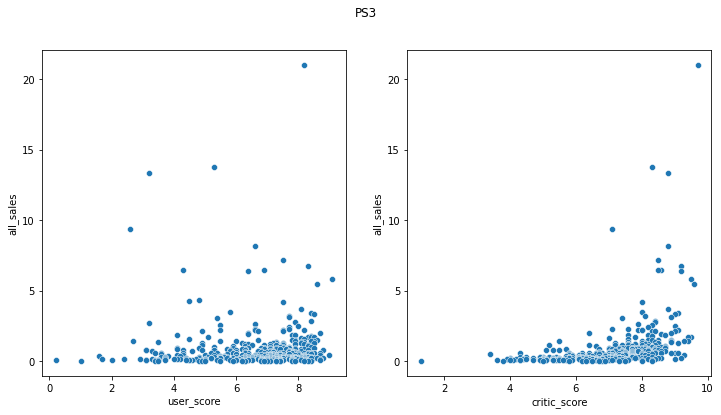

Корреляция между отзывами критиков и продажами 0.38011114718290767
Корреляция между отзывами пользователей и продажами 0.014089348308019396


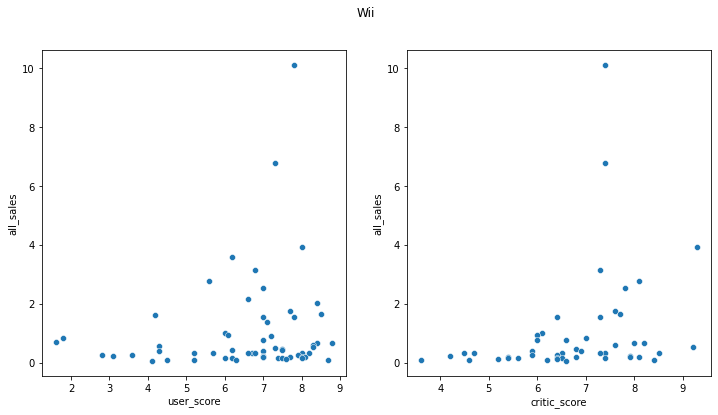

Корреляция между отзывами критиков и продажами 0.29226949542729336
Корреляция между отзывами пользователей и продажами 0.14550376734945006


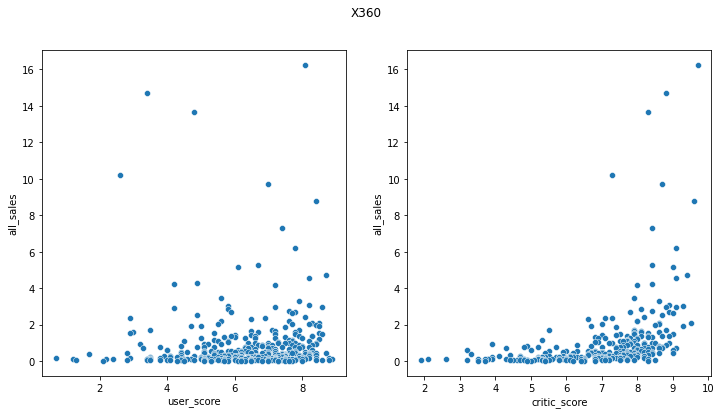

Корреляция между отзывами критиков и продажами 0.39125332454845524
Корреляция между отзывами пользователей и продажами 0.03891817072910255


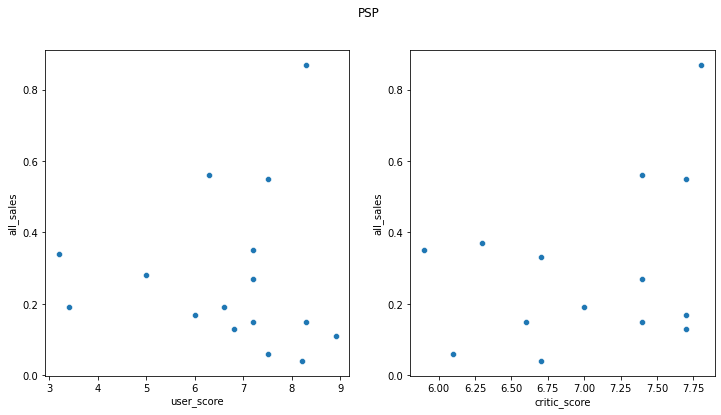

Корреляция между отзывами критиков и продажами 0.3581381002722691
Корреляция между отзывами пользователей и продажами 0.010035480754033762


In [33]:
for platform in platform_list:
    other_platform(platform)

Мнение критиков всегда имеет большее влияние на продажи, чем отзывы пользователей. 

In [34]:
#общее распределение игр по жанрам
genre_pivot = data_new.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False)
genre_pivot

,all_sales
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160
Role-Playing,0.150
Action,0.130
Misc,0.130
Simulation,0.110


Самые прибыльные жарны:  Shooter, Sports, Platform, Fighting, Racing	

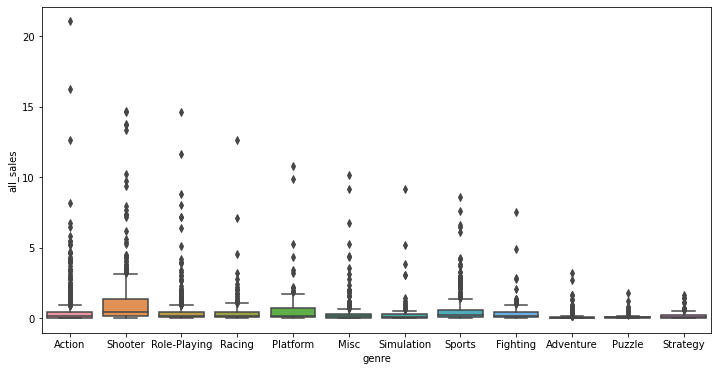

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data_new, x='genre', y='all_sales');
plt.show()

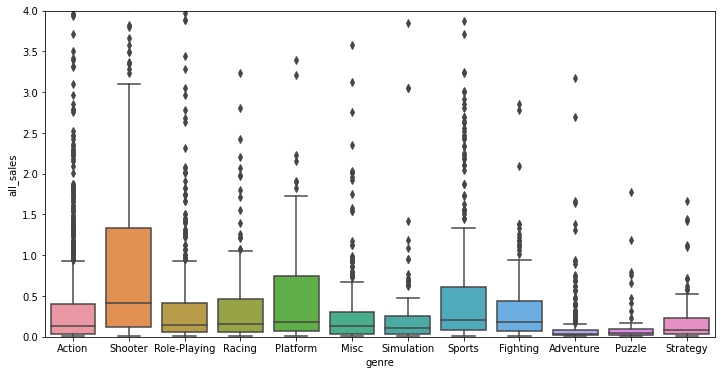

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data_new, x='genre', y='all_sales');
plt.ylim(0,4)
plt.show()

# Составление портрета пользователя каждого региона

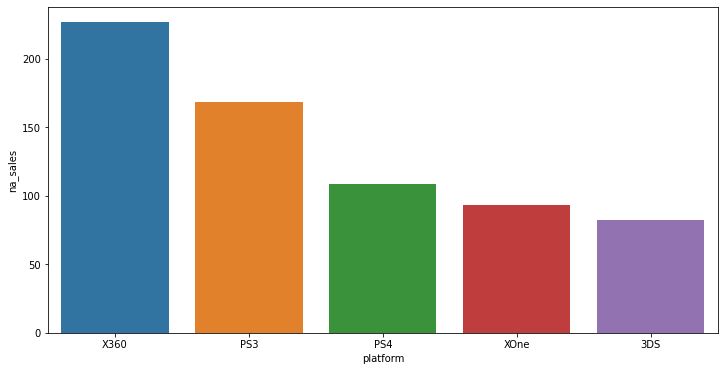

In [37]:
#cамые популярные платформы NA
na_top_platform = data_new.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head(5)
na_top_platform
plt.figure(figsize=(12,6))
sns.barplot(data=na_top_platform, x='platform', y='na_sales');

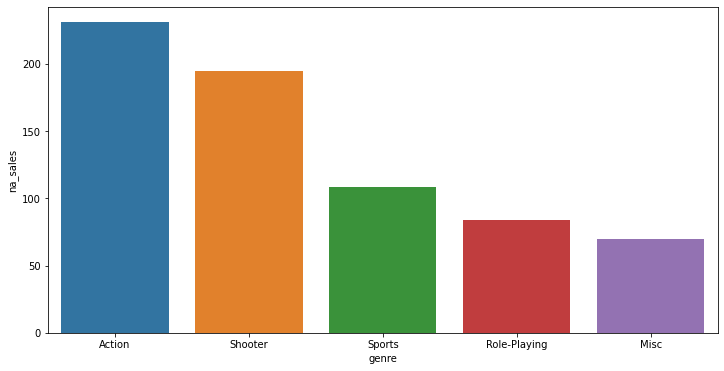

In [38]:
#cамые популярные жарны NA
na_top_genre = data_new.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().head(5)
na_top_genre
plt.figure(figsize=(12,6))
sns.barplot(data=na_top_genre, x='genre', y='na_sales');

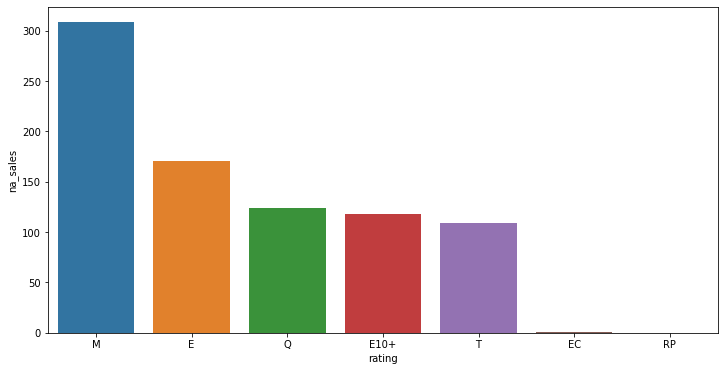

In [39]:
#влияние рейтинга ESRB на продажи NA
na_top_rating = data_new.pivot_table(index='rating', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na_top_rating
plt.figure(figsize=(12,6))
sns.barplot(data=na_top_rating, x='rating', y='na_sales');

- Самая популярная платформа в Северной Америке в период 2011-2016 - Х360.
- Топ 5 популярных жанров: Action ,Shooter, Sports, Role-Playing, Misc.
- В Северной Америке наибольшей популярностью пользуются игры с рейтингом M (для взрослых 17+)

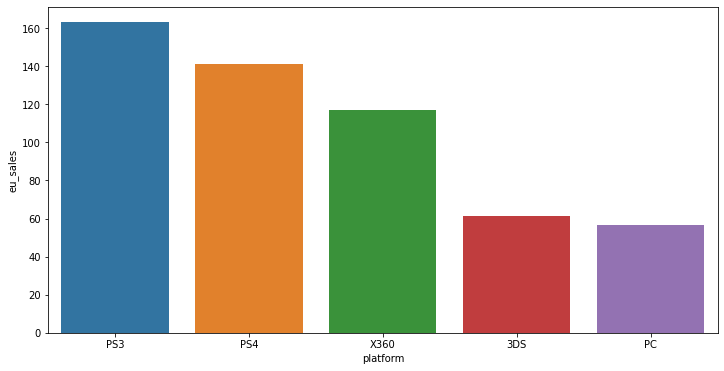

In [40]:
#cамые популярные платформы EU
eu_top_platform = data_new.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head(5)
eu_top_platform
plt.figure(figsize=(12,6))
sns.barplot(data=eu_top_platform, x='platform', y='eu_sales');

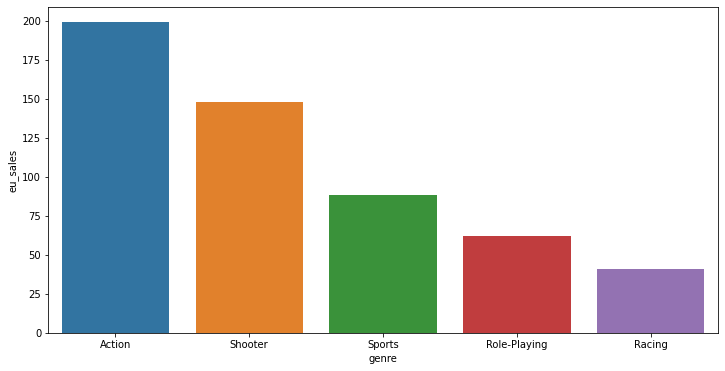

In [41]:
#cамые популярные жарны EU
eu_top_genre = data_new.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head(5)
eu_top_genre
plt.figure(figsize=(12,6))
sns.barplot(data=eu_top_genre, x='genre', y='eu_sales');

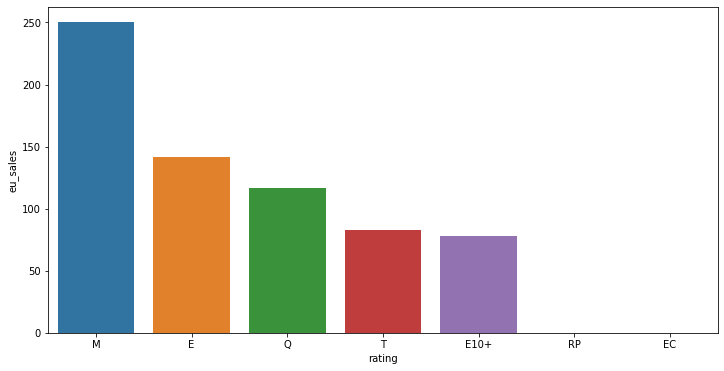

In [42]:
#влияние рейтинга ESRB на продажи EU
eu_top_rating = data_new.pivot_table(index='rating', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu_top_rating
plt.figure(figsize=(12,6))
sns.barplot(data=eu_top_rating, x='rating', y='eu_sales');

- Самая популярная платформа в Европе в период 2011-2016 - PS3. Далее идут PS4 и X360
- Топ 5 популярных жанров: Action , Sports, Shooter, Role-Playing, Misc
- В Европе наибольшей популярностью пользуются игры с рейтингом M (для взрослых 17+)

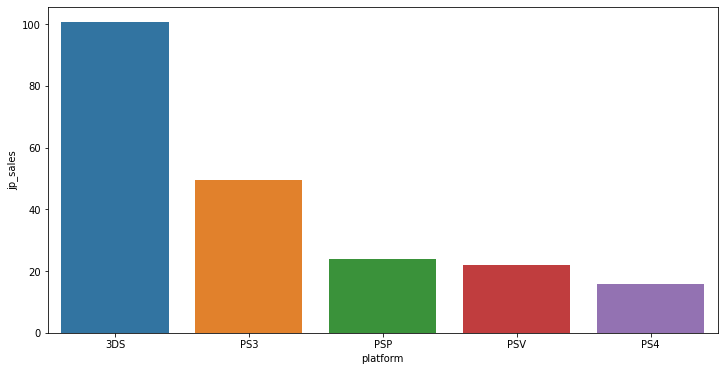

In [43]:
#cамые популярные платформы JP
jp_top_platform = data_new.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head(5)
jp_top_platform
plt.figure(figsize=(12,6))
sns.barplot(data=jp_top_platform, x='platform', y='jp_sales');

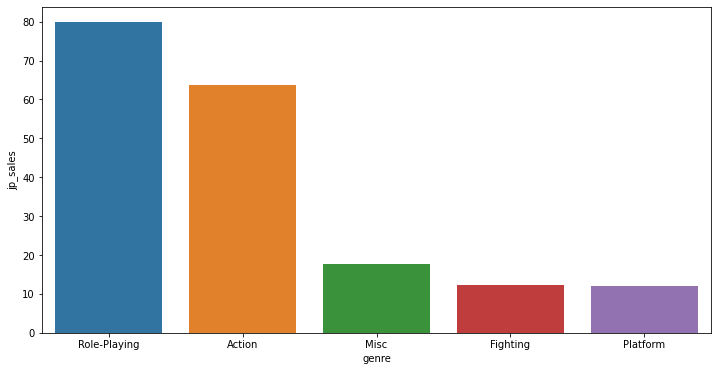

In [44]:
#cамые популярные жарны JP
jp_top_genre = data_new.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head(5)
jp_top_genre
plt.figure(figsize=(12,6))
sns.barplot(data=jp_top_genre, x='genre', y='jp_sales');

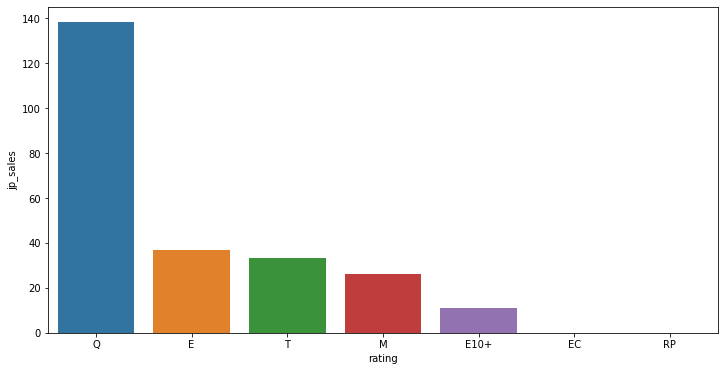

In [45]:
#влияние рейтинга ESRB на продажи JP
jp_top_rating = data_new.pivot_table(index='rating', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp_top_rating
plt.figure(figsize=(12,6))
sns.barplot(data=jp_top_rating, x='rating', y='jp_sales');

In [46]:
temp = data_new.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


Q       1708
M        622
E        618
T        616
E10+     456
EC         1
RP         1
Name: rating, dtype: int64

- Самая популярная платформа в Японии в период 2011-2016 - 3DS.
- Топ 5 популярных жанров: Role-Playing, Action, Misc, Fighting, Platform
- Возврастной рейтинг наиболее популярных для Японии игр определить не удалось, так как рейтинг ESRB не предназначен для маркировки игр в Японии. 

# Проверка гипотезы.

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.   
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [47]:
#cредний рейтинг пользователя XOne
xone_user_score = data_new[data_new['platform'] == 'XOne']['user_score']
xone_user_score.mean()

6.521428571428572

In [48]:
#cредний рейтинг пользователя PC
pc_user_score = data_new[data_new['platform'] == 'PC']['user_score']
pc_user_score.mean()

6.451791530944625

In [49]:
alpha = .01

results = st.ttest_ind(xone_user_score.dropna(), pc_user_score.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports разные.  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [50]:
#средний пользовательсксий рейтинг жанра Action
action_user_score = data_new[data_new['genre'] == 'Action']['user_score']
action_user_score.mean()

6.775903614457831

In [51]:
#средний пользовательсксий рейтинг жанра Sports
sports_user_score = data_new[data_new['genre'] == 'Sports']['user_score']
sports_user_score.mean()

5.650813008130081

In [52]:
alpha = .01

results = st.ttest_ind(action_user_score.dropna(), sports_user_score.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


# Общий вывод

Изучен датасет с историческими данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами.  
Выявлены определяющие успешность игры закономерности для планирования рекламных кампаний. Отработан принцип работы с данными.  

На этапе подготовки данных было селано сделующее:
- Приведены стобцы к нижнему регистру;
- Выявлены и удалены пропущенные значения в следующих стобцах: 'name', 'genre', 'year_of_release';
- Изменен тип данных в стобцах 'year_of_release' и 'rating';
- Отредактированы данные в стобце 'critic_score' (запятная сдвину на один зак влево);
- Было выявлено что для некоторых платформ отсутствует информация об оценке критиков, оценке пользователей и рейтинге сразу.
 Может был передан не полный датасет, а может некоторые платформы отказались предоставлять данные, а может быть некоторые платформы не имеют данных об оценке пользователей, потому что у них нет подключения к сети(игры покупают на сторонних носителях, а онлайн магазин отсутствует). В rating пропуски могут быть связаны с тем, что организация Entertainment Software Rating Board образовалась в 1994 году и игры, вышедшие до этого года не получили рейтинг от этой организации;
- Обработано значение tbd - to be determined (будет определено позднее). Судя по формулировке, можно предположить, что рейтинг пользователей отсутствует т.к. в некоторых регионах продажи еще не запущены или запущены недавно;
- Добавлен стобец 'all_sales' с суммарными продажами во всех регионах.

На этапе исследовательского анализа данных:
- Выявлено что спрос на компьютерные игры начал расти в середине 90х(думаю что связано с распространением настольных компьютеров), пик спроса пришелся на 2008 год, а дальше наступила эра мобильных приложений и начался спад.
- Сделан вывод, что самыми популярными устройствами для игр с 1980 по 2016 были : PS2 и DS далее PS3, Wii, X360 , PSP.
- Выявлено что в среднем игровые платформы актуальны на протяжении 10 лет. 
- Выбран промежут для анализа данных 2011-2016 года
- Cамыми потенциально прибыльными платформами признаны PS3 и X360.
- Оценено влияние мнения критиков и пользователей на продажи. Мнение критиков всегда имеет большее влияние на продажи, чем отзывы пользователей. 
- Самыми прибыльными признаны жарны: Shooter, Sports, Platform, Fighting, Racingg

Составлен портрет пользователя каждого региона:

Северная Америка:
- Самая популярная платформа в Северной Америке в период 2011-2016 - Х360.
- Топ 5 популярных жанров: Action ,Shooter, Sports, Role-Playing, Misc.
- В Северной Америке наибольшей популярностью пользуются игры с рейтингом M (для взрослых 17+)

Европа:
- Самая популярная платформа в Европе в период 2011-2016 - PS3. Далее идут PS4 и X360
- Топ 5 популярных жанров: Action , Sports, Shooter, Role-Playing, Misc
- В Европе наибольшей популярностью пользуются игры с рейтингом M (для взрослых 17+)

Япония:
- Самая популярная платформа в Японии в период 2011-2016 - 3DS.
- Топ 5 популярных жанров: Role-Playing, Action, Misc, Fighting, Platform
- Возврастной рейтинг наиболее популярных для Японии игр определить не удалось, так как рейтинг ESRB не предназначен для маркировки игр в Японии. 
Проверены следующие гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.(Не получилось отвергнуть гипотезу)
- Средние пользовательские рейтинги жанров Action и Sports разные. (Гипотеза отвергнута)


Исходя из данных выше можно сделать вывод, что в 2017 году наиболее прибыльно тратить рекламный бюджет на игры для PS4 и XBOX (так как их предудщие версии были признаны потенциально прибыльными) в жанрах Action/Sports/Role-Playing с возрастным ограничением 17+. Мнению критиков стоить уделить большее внимание, чем оценке пользователей. 